Loading dataset...
Dataset shape: (59946, 31)
Total number of profiles: 59946

Education column info:
Non-null values: 53318
Null values: 6628
Unique education categories: 32

All education categories found (32):
 1. college/university                       | Count:   801 |   1.3%
 2. dropped out of college/university        | Count:   995 |   1.7%
 3. dropped out of high school               | Count:   102 |   0.2%
 4. dropped out of law school                | Count:    18 |   0.0%
 5. dropped out of masters program           | Count:   140 |   0.2%
 6. dropped out of med school                | Count:    12 |   0.0%
 7. dropped out of ph.d program              | Count:   127 |   0.2%
 8. dropped out of space camp                | Count:   523 |   0.9%
 9. dropped out of two-year college          | Count:   191 |   0.3%
10. graduated from college/university        | Count: 23959 |  40.0%
11. graduated from high school               | Count:  1428 |   2.4%
12. graduated from law schoo

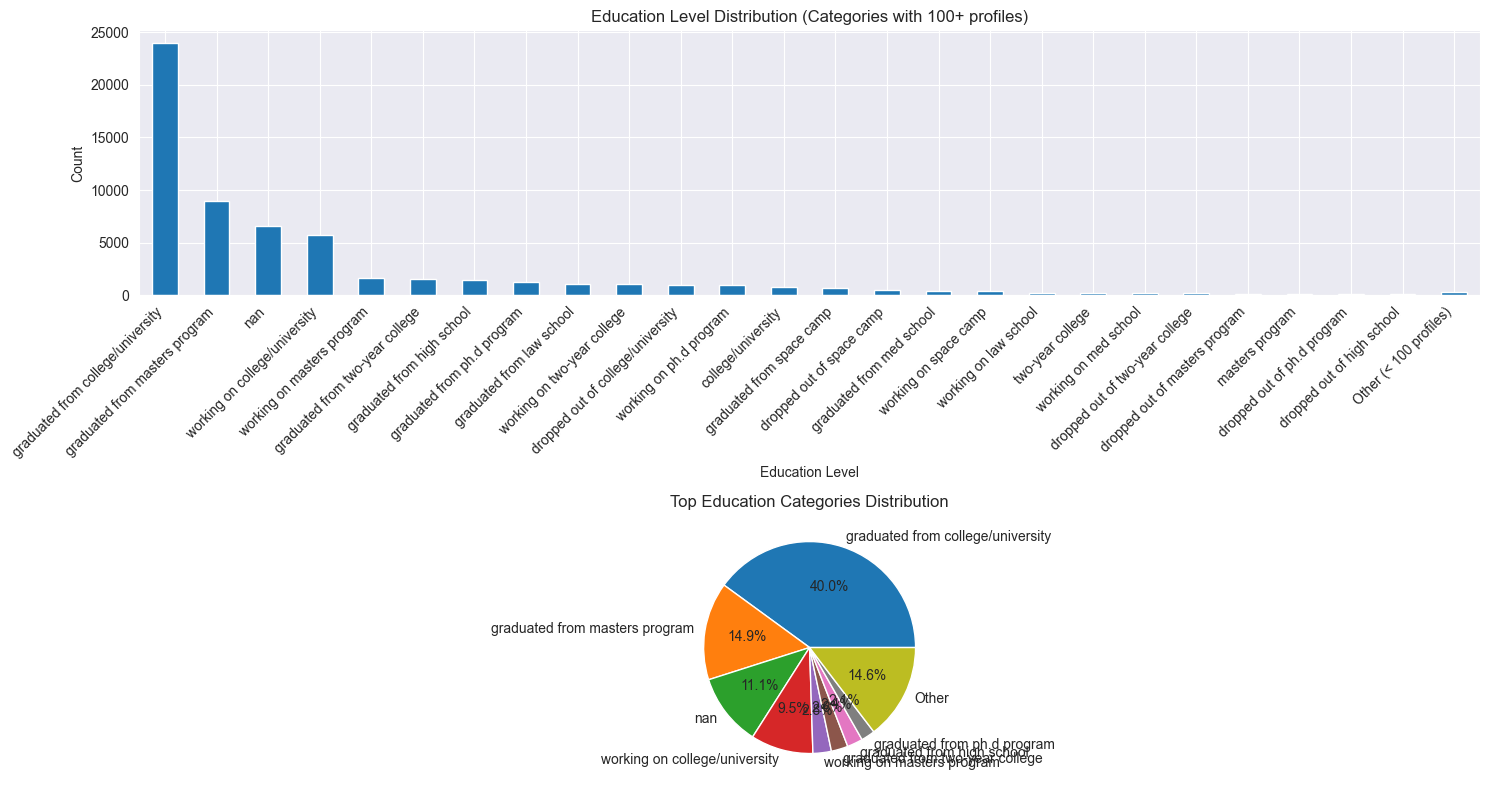


Education category analysis:
College/University related (8):
  • working on college/university       (5712)
  • graduated from college/university   (23959)
  • working on two-year college         (1074)
  • college/university                  ( 801)
  • two-year college                    ( 222)
  • graduated from two-year college     (1531)
  • dropped out of college/university   ( 995)
  • dropped out of two-year college     ( 191)

Graduate/Professional related (20):
  • graduated from masters program      (8961)
  • graduated from college/university   (23959)
  • graduated from high school          (1428)
  • working on masters program          (1683)
  • graduated from space camp           ( 657)
  • graduated from ph.d program         (1272)
  • graduated from law school           (1122)
  • working on ph.d program             ( 983)
  • graduated from two-year college     (1531)
  • working on med school               ( 212)
  • graduated from med school           ( 446)
  • ma

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the full dataset
print("Loading dataset...")
df = pd.read_csv('okcupid_profiles.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total number of profiles: {len(df)}")

# Examine education column
print(f"\nEducation column info:")
print(f"Non-null values: {df['education'].notna().sum()}")
print(f"Null values: {df['education'].isna().sum()}")
print(f"Unique education categories: {df['education'].nunique()}")

# Get all unique education categories
education_categories = df['education'].dropna().unique()
print(f"\nAll education categories found ({len(education_categories)}):")
print("=" * 60)

for i, category in enumerate(sorted(education_categories), 1):
    count = (df['education'] == category).sum()
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {category:<40} | Count: {count:5d} | {percentage:5.1f}%")

# Get detailed counts
education_counts = df['education'].value_counts(dropna=False)
print(f"\nEducation distribution (sorted by frequency):")
print("=" * 60)
print(education_counts)

# Visualize the distribution
plt.figure(figsize=(15, 8))
education_counts_clean = education_counts.dropna()

# Only show categories with more than 100 profiles for readability
significant_categories = education_counts_clean[education_counts_clean >= 100]
other_count = education_counts_clean[education_counts_clean < 100].sum()

if other_count > 0:
    significant_categories['Other (< 100 profiles)'] = other_count

plt.subplot(2, 1, 1)
significant_categories.plot(kind='bar')
plt.title('Education Level Distribution (Categories with 100+ profiles)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Pie chart for major categories
plt.subplot(2, 1, 2)
top_categories = education_counts_clean.head(8)
other_small = education_counts_clean.iloc[8:].sum()
if other_small > 0:
    top_categories['Other'] = other_small

plt.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%')
plt.title('Top Education Categories Distribution')

plt.tight_layout()
plt.show()

# Look for patterns in education categories
print(f"\nEducation category analysis:")
print("=" * 40)

# Group similar categories
college_related = [cat for cat in education_categories if 'college' in cat.lower() or 'university' in cat.lower()]
graduate_related = [cat for cat in education_categories if any(word in cat.lower() for word in ['master', 'graduate', 'ph.d', 'phd', 'doctorate', 'law', 'med'])]
high_school_related = [cat for cat in education_categories if 'high school' in cat.lower()]
working_on = [cat for cat in education_categories if 'working on' in cat.lower()]
dropped_out = [cat for cat in education_categories if 'dropped out' in cat.lower()]

print(f"College/University related ({len(college_related)}):")
for cat in college_related:
    count = (df['education'] == cat).sum()
    print(f"  • {cat:<35} ({count:4d})")

print(f"\nGraduate/Professional related ({len(graduate_related)}):")
for cat in graduate_related:
    count = (df['education'] == cat).sum()
    print(f"  • {cat:<35} ({count:4d})")

print(f"\nHigh School related ({len(high_school_related)}):")
for cat in high_school_related:
    count = (df['education'] == cat).sum()
    print(f"  • {cat:<35} ({count:4d})")

print(f"\n'Working on' categories ({len(working_on)}):")
for cat in working_on:
    count = (df['education'] == cat).sum()
    print(f"  • {cat:<35} ({count:4d})")

if dropped_out:
    print(f"\n'Dropped out' categories ({len(dropped_out)}):")
    for cat in dropped_out:
        count = (df['education'] == cat).sum()
        print(f"  • {cat:<35} ({count:4d})")

# Suggest classification scheme
print(f"\n SUGGESTED CLASSIFICATION SCHEME:")
print("=" * 50)
print("Based on the data, you could group categories into:")
print("\n1. HIGH SCHOOL LEVEL:")
print("   - High school graduates")
print("   - Some high school")

print("\n2. SOME COLLEGE:")
print("   - Working on college/university")
print("   - Some college")
print("   - Dropped out of college")

print("\n3. COLLEGE GRADUATE:")
print("   - Graduated from college/university")
print("   - College/university")

print("\n4. GRADUATE/PROFESSIONAL:")
print("   - Working on masters/graduate program")
print("   - Graduated from masters program")
print("   - Working on Ph.D")
print("   - Graduated from Ph.D program")
print("   - Law school")
print("   - Med school")

print("\n5. OTHER/VOCATIONAL:")
print("   - Working on space camp")
print("   - Working on two-year college")
print("   - Other specialized programs")

# Calculate potential class distribution with suggested grouping
def classify_education(education):
    if pd.isna(education):
        return 'Unknown'

    education = education.lower()

    if 'high school' in education:
        return 'High School Level'
    elif any(word in education for word in ['working on college', 'working on university', 'some college']):
        return 'Some College'
    elif any(word in education for word in ['graduated from college', 'graduated from university', 'college/university']):
        return 'College Graduate'
    elif any(word in education for word in ['master', 'graduate', 'ph.d', 'phd', 'doctorate', 'law', 'med']):
        return 'Graduate/Professional'
    else:
        return 'Other/Vocational'

df['education_grouped'] = df['education'].apply(classify_education)
grouped_counts = df['education_grouped'].value_counts()

print(f"\nPROPOSED GROUPED DISTRIBUTION:")
print("=" * 40)
for category, count in grouped_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{category:<20} | {count:5d} | {percentage:5.1f}%")

# Check for adequate sample sizes
print(f"\n SAMPLE SIZE ANALYSIS:")
print("=" * 30)
min_samples = 50  # Minimum for ML
adequate_samples = grouped_counts[grouped_counts >= min_samples]
small_samples = grouped_counts[grouped_counts < min_samples]

print(f"Categories with adequate samples (≥{min_samples}):")
for category, count in adequate_samples.items():
    print(f"   {category}: {count}")

if len(small_samples) > 0:
    print(f"\nCategories with small samples (<{min_samples}):")
    for category, count in small_samples.items():
        print(f"  {category}: {count}")


# Save the analysis
df_summary = pd.DataFrame({
    'Original_Category': education_counts.index[:20],  # Top 20
    'Count': education_counts.values[:20],
    'Percentage': (education_counts.values[:20] / len(df)) * 100
})


df_summary.to_csv('education_analysis_summary.csv', index=False)

